# Building the first Neural network using `Keras` for the MNIST digit classification
---

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt

## Preparing the data -

In [3]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

In [4]:
print(f"Training shape: {X_train.shape}") # 60,000 28 X 28 images
print(f"Training target shape: {y_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")

Training shape: (60000, 28, 28)
Training target shape: (60000,)
Test shape: (10000, 28, 28)
Test target shape: (10000,)


Label is : 5


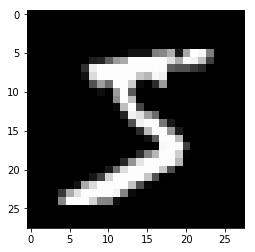

In [5]:
plt.imshow(X_train[0], cmap='gray')
print(f"Label is : {y_train[0]}")

In [6]:
# Normalize the data

X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the image for the NN to take as input for first layer

X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(f"Shape after flattening the image: {X_train.shape}")

Shape after flattening the image: (60000, 784)


## Building the Model -

`Keras` model is built using the `Sequential` class, which represents a linear stack of layers or the `functional Model` class, which is more customizable.
We will use a `Sequential` class. The constructor takes an array of `Keras layers`. Since we are building a standard feedforward network, we only need the `Dense` layer

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28, )),
#     Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

The first 2 layers have 64 nodes each, using a `ReLU` activation function. The last layer is a softmax output layer with 10 nodes, one for each digit.
Also, we have to mention the input shape, which is 28 X 28 in this case.

## Compiling the Model -

Before training, we have to configure the training process.

- **Optimizer** - We will use `Adam` optimizer.
- **Loss Function** - Since we are using `Softmax` output, we'll use the `cross-entropy loss`. In Keras, `binary_crossentropy` (2 classes) and `categorical_crossentropy` (>2 classes)
- **Metrics** - A list of metrics. Since this is a classification task, we can use `accuracy`.

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the model -

In [10]:
history = model.fit(
    X_train,
    to_categorical(y_train), # convert the single output target to one-hot vectors of 10-dimensions
    epochs=5,
    batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0580 - accuracy: 0.9819
Epoch 2/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0494 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0426 - accuracy: 0.9865
Epoch 4/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.0372 - accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.0320 - accuracy: 0.9901


The Accuracy of the training set is very high which might be an indication of overfitting

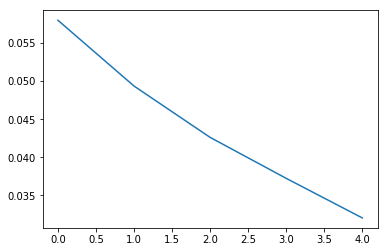

In [16]:
plt.plot(history.history['loss'])
plt.title("Loss Vs Epochs");

## Testing the model

In [22]:
history = model.evaluate(X_test, to_categorical(y_test))
print(f"Loss of testing set: {history[0]} and Accuracy is: {history[1]*100}%")

10000/10000 [==============================] - 1s 52us/step
Loss of testing set: 0.09606662243550236 and Accuracy is: 97.13000059127808%
